# Desafío Kaggle

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import scipy.io
import matplotlib.patches as patches
import pandas as pd
import shutil
import tqdm
import PIL
import itertools
import json

## Conectar a google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Descomprimir archivos

In [ ]:
!unzip "/content/gdrive/MyDrive/Documentos/Universidad/Semestre 2023-2/Intro a las redes neuronales/Tarea 2/desafío/inf-395-tarea-2.zip"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: images/tacos/1015285.jpg  
  inflating: images/tacos/1023154.jpg  
  inflating: images/tacos/1023947.jpg  
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: im

## Carga de imágenes

### Obtener mappings

In [ ]:
number_to_dish = json.load(open('dish_dict.json', 'r'))
number_to_dish

{'0': 'foie_gras',
 '1': 'club_sandwich',
 '2': 'cheese_plate',
 '3': 'cup_cakes',
 '4': 'garlic_bread',
 '5': 'gnocchi',
 '6': 'ice_cream',
 '7': 'samosa',
 '8': 'donuts',
 '9': 'tuna_tartare',
 '10': 'filet_mignon',
 '11': 'seaweed_salad',
 '12': 'french_toast',
 '13': 'chicken_curry',
 '14': 'shrimp_and_grits',
 '15': 'steak',
 '16': 'cheesecake',
 '17': 'red_velvet_cake',
 '18': 'waffles',
 '19': 'churros',
 '20': 'gyoza',
 '21': 'lobster_roll_sandwich',
 '22': 'huevos_rancheros',
 '23': 'breakfast_burrito',
 '24': 'grilled_cheese_sandwich',
 '25': 'spaghetti_bolognese',
 '26': 'falafel',
 '27': 'poutine',
 '28': 'greek_salad',
 '29': 'beef_tartare',
 '30': 'fried_calamari',
 '31': 'guacamole',
 '32': 'ravioli',
 '33': 'lobster_bisque',
 '34': 'beet_salad',
 '35': 'risotto',
 '36': 'crab_cakes',
 '37': 'strawberry_shortcake',
 '38': 'edamame',
 '39': 'ceviche',
 '40': 'hot_and_sour_soup',
 '41': 'spring_rolls',
 '42': 'sashimi',
 '43': 'paella',
 '44': 'clam_chowder',
 '45': 'miso_

In [ ]:
dish_to_number = {value: key for key, value in number_to_dish.items()}
dish_to_number

{'foie_gras': '0',
 'club_sandwich': '1',
 'cheese_plate': '2',
 'cup_cakes': '3',
 'garlic_bread': '4',
 'gnocchi': '5',
 'ice_cream': '6',
 'samosa': '7',
 'donuts': '8',
 'tuna_tartare': '9',
 'filet_mignon': '10',
 'seaweed_salad': '11',
 'french_toast': '12',
 'chicken_curry': '13',
 'shrimp_and_grits': '14',
 'steak': '15',
 'cheesecake': '16',
 'red_velvet_cake': '17',
 'waffles': '18',
 'churros': '19',
 'gyoza': '20',
 'lobster_roll_sandwich': '21',
 'huevos_rancheros': '22',
 'breakfast_burrito': '23',
 'grilled_cheese_sandwich': '24',
 'spaghetti_bolognese': '25',
 'falafel': '26',
 'poutine': '27',
 'greek_salad': '28',
 'beef_tartare': '29',
 'fried_calamari': '30',
 'guacamole': '31',
 'ravioli': '32',
 'lobster_bisque': '33',
 'beet_salad': '34',
 'risotto': '35',
 'crab_cakes': '36',
 'strawberry_shortcake': '37',
 'edamame': '38',
 'ceviche': '39',
 'hot_and_sour_soup': '40',
 'spring_rolls': '41',
 'sashimi': '42',
 'paella': '43',
 'clam_chowder': '44',
 'miso_soup':

In [ ]:
food_category_to_number = json.load(open('food_categories_dict.json', 'r'))
food_category_to_number = {category: number for number, category in food_category_to_number.items()}
food_category_to_number

{'salad': '0', 'dessert': '1', 'main_dish': '2'}

In [ ]:
hierarchy = json.load(open('hierarchy_dict.json', 'r'))
dish_to_food_category_number = {}

for food_category, dishes in hierarchy.items():
  for _, dish in dishes.items():
    dish_to_food_category_number[dish] = food_category_to_number[food_category]

dish_to_food_category_number

{'seaweed_salad': '0',
 'beet_salad': '0',
 'caesar_salad': '0',
 'caprese_salad': '0',
 'greek_salad': '0',
 'apple_pie': '1',
 'baklava': '1',
 'beignets': '1',
 'bread_pudding': '1',
 'cannoli': '1',
 'carrot_cake': '1',
 'cheesecake': '1',
 'chocolate_cake': '1',
 'chocolate_mousse': '1',
 'churros': '1',
 'creme_brulee': '1',
 'cup_cakes': '1',
 'donuts': '1',
 'frozen_yogurt': '1',
 'ice_cream': '1',
 'macarons': '1',
 'panna_cotta': '1',
 'red_velvet_cake': '1',
 'strawberry_shortcake': '1',
 'tiramisu': '1',
 'waffles': '1',
 'baby_back_ribs': '2',
 'beef_carpaccio': '2',
 'beef_tartare': '2',
 'bibimbap': '2',
 'breakfast_burrito': '2',
 'bruschetta': '2',
 'ceviche': '2',
 'cheese_plate': '2',
 'chicken_curry': '2',
 'chicken_quesadilla': '2',
 'chicken_wings': '2',
 'clam_chowder': '2',
 'club_sandwich': '2',
 'crab_cakes': '2',
 'croque_madame': '2',
 'deviled_eggs': '2',
 'dumplings': '2',
 'edamame': '2',
 'eggs_benedict': '2',
 'escargots': '2',
 'falafel': '2',
 'filet_

### Crear carpetas para train

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
def create_directory(path):
  if not os.path.exists(path):
      os.makedirs(path)

create_directory('train')

In [ ]:
# Copy train images
for index, row in train.iterrows():
  dish_name = number_to_dish[str(row.dish)]
  if not os.path.exists('train/' + dish_name):
      os.makedirs('train/' + dish_name)

  image_name = row.path.split('/')[-1]
  shutil.copy(row.path, 'train/' + dish_name + '/' + image_name)

### Crear train y validation dataset

In [ ]:
image_size = 224
batch_size = 32
validation_split = 0.2

train_dataset = keras.utils.image_dataset_from_directory(
  'train',
  validation_split=validation_split,
  subset='training',
  labels='inferred',
  label_mode='categorical',
  color_mode='rgb',
  batch_size=batch_size,
  seed=2023,
  image_size=(image_size, image_size)
)

validation_dataset = keras.utils.image_dataset_from_directory(
  'train',
  validation_split=validation_split,
  subset='validation',
  labels='inferred',
  label_mode='categorical',
  color_mode='rgb',
  batch_size=batch_size,
  seed=2023,
  image_size=(image_size, image_size)
)

Found 75750 files belonging to 101 classes.
Using 60600 files for training.
Found 75750 files belonging to 101 classes.
Using 15150 files for validation.


In [ ]:
# Obtener class mapping
number_to_class_name = {label: class_name for label, class_name in enumerate(train_dataset.class_names)}
print(number_to_class_name)

{0: 'apple_pie', 1: 'baby_back_ribs', 2: 'baklava', 3: 'beef_carpaccio', 4: 'beef_tartare', 5: 'beet_salad', 6: 'beignets', 7: 'bibimbap', 8: 'bread_pudding', 9: 'breakfast_burrito', 10: 'bruschetta', 11: 'caesar_salad', 12: 'cannoli', 13: 'caprese_salad', 14: 'carrot_cake', 15: 'ceviche', 16: 'cheese_plate', 17: 'cheesecake', 18: 'chicken_curry', 19: 'chicken_quesadilla', 20: 'chicken_wings', 21: 'chocolate_cake', 22: 'chocolate_mousse', 23: 'churros', 24: 'clam_chowder', 25: 'club_sandwich', 26: 'crab_cakes', 27: 'creme_brulee', 28: 'croque_madame', 29: 'cup_cakes', 30: 'deviled_eggs', 31: 'donuts', 32: 'dumplings', 33: 'edamame', 34: 'eggs_benedict', 35: 'escargots', 36: 'falafel', 37: 'filet_mignon', 38: 'fish_and_chips', 39: 'foie_gras', 40: 'french_fries', 41: 'french_onion_soup', 42: 'french_toast', 43: 'fried_calamari', 44: 'fried_rice', 45: 'frozen_yogurt', 46: 'garlic_bread', 47: 'gnocchi', 48: 'greek_salad', 49: 'grilled_cheese_sandwich', 50: 'grilled_salmon', 51: 'guacamole

### Modelo Mobile Net

In [ ]:
def depthwise_separable_block(x, filters, strides):
    x = keras.layers.DepthwiseConv2D((3, 3), strides=strides, padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)

    x = keras.layers.Conv2D(filters, (1, 1), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)

    return x

def create_mobilenet_model(input_shape, num_classes):
    input_layer = keras.layers.Input(shape=input_shape)

    x = keras.layers.Rescaling(1./255.)(input_layer)

    x = keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.ReLU()(x)

    x = depthwise_separable_block(x, 64, strides=(1, 1))

    x = depthwise_separable_block(x, 128, strides=(2, 2))
    x = depthwise_separable_block(x, 128, strides=(1, 1))

    x = depthwise_separable_block(x, 256, strides=(2, 2))
    x = depthwise_separable_block(x, 256, strides=(1, 1))

    x = depthwise_separable_block(x, 512, strides=(2, 2))
    x = depthwise_separable_block(x, 512, strides=(1, 1))
    x = depthwise_separable_block(x, 512, strides=(1, 1))
    x = depthwise_separable_block(x, 512, strides=(1, 1))
    x = depthwise_separable_block(x, 512, strides=(1, 1))
    x = depthwise_separable_block(x, 512, strides=(1, 1))
    x = depthwise_separable_block(x, 512, strides=(1, 1))

    x = depthwise_separable_block(x, 1024, strides=(2, 2))
    x = depthwise_separable_block(x, 1024, strides=(1, 1))

    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs=input_layer, outputs=x)

    return model

# Create the model
input_shape = (image_size, image_size, 3)  # Specify the input shape
num_classes = len(number_to_class_name)  # Specify the number of output classes
model = create_mobilenet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_110 (B  (None, 112, 112, 32)      128       
 atchNormalization)                                              
                                                                 
 re_lu_110 (ReLU)            (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d_53 (Depth  (None, 112, 112, 32)      320       
 wiseConv2D)                                               

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  patience=5,
  verbose=1,
  restore_best_weights=True
)

In [ ]:
num_epochs = 40

history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=num_epochs,
  callbacks=es_callback,
)

Epoch 1/40
1894/1894 [==============================] - 294s 146ms/step - loss: 4.2049 - accuracy: 0.0707 - val_loss: 4.2585 - val_accuracy: 0.0821
Epoch 2/40
1894/1894 [==============================] - 278s 146ms/step - loss: 3.5654 - accuracy: 0.1623 - val_loss: 3.7570 - val_accuracy: 0.1533
Epoch 3/40
1894/1894 [==============================] - 285s 150ms/step - loss: 3.0269 - accuracy: 0.2659 - val_loss: 3.2300 - val_accuracy: 0.2463
Epoch 4/40
1894/1894 [==============================] - 277s 146ms/step - loss: 2.5751 - accuracy: 0.3570 - val_loss: 3.1591 - val_accuracy: 0.2938
Epoch 5/40
1894/1894 [==============================] - 280s 147ms/step - loss: 2.1936 - accuracy: 0.4419 - val_loss: 2.8977 - val_accuracy: 0.3457
Epoch 6/40
1894/1894 [==============================] - 285s 150ms/step - loss: 1.8783 - accuracy: 0.5129 - val_loss: 2.5127 - val_accuracy: 0.4114
Epoch 7/40
1894/1894 [==============================] - 288s 152ms/step - loss: 1.6060 - accuracy: 0.5748 - val_

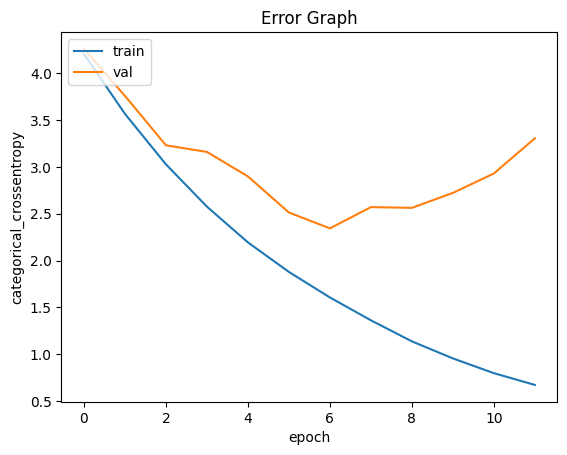

In [ ]:
def plot_losses(history, loss):
  "Función para graficar la función de pérdida del modelo"
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Error Graph')
  plt.ylabel(loss.name)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

plot_losses(history, keras.losses.CategoricalCrossentropy())

### Guardar modelo

In [ ]:
model.save('model.keras')

## Hacer predicciones

In [ ]:
predictions = []

file_paths = test.path.tolist()
batch_size = 1000

progress_bar = tqdm.tqdm(total=len(test.path.tolist()), desc="Processing", position=0, leave=True)

for i in range(0, len(file_paths), batch_size):
  batch_paths = file_paths[i:i + batch_size]
  batch = []

  for image_path in batch_paths:
    img = PIL.Image.open(image_path)
    img = img.resize((image_size, image_size))
    img = np.array(img)

    # Chequear que la imagen tenga 3 canales
    if img.shape[-1] != 3:
      img = np.stack((img,)*3, axis=-1)

    batch.append(img)

  batch = np.array(batch)
  predictions.append(model.predict(batch))
  progress_bar.update(len(batch_paths))

predictions = list(itertools.chain.from_iterable(predictions))
progress_bar.close()

Processing:   0%|          | 0/25250 [00:00<?, ?it/s]

32/32 [==============================] - 2s 51ms/step


Processing:   4%|▍         | 1000/25250 [00:12<04:52, 83.02it/s]

32/32 [==============================] - 1s 33ms/step


Processing:   8%|▊         | 2000/25250 [00:21<04:03, 95.41it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  12%|█▏        | 3000/25250 [00:29<03:30, 105.51it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  16%|█▌        | 4000/25250 [00:38<03:19, 106.37it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  20%|█▉        | 5000/25250 [00:48<03:08, 107.31it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  24%|██▍       | 6000/25250 [00:56<02:51, 112.02it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  28%|██▊       | 7000/25250 [01:05<02:44, 111.24it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  32%|███▏      | 8000/25250 [01:14<02:33, 112.05it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  36%|███▌      | 9000/25250 [01:22<02:21, 115.00it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  40%|███▉      | 10000/25250 [01:31<02:14, 113.59it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  44%|████▎     | 11000/25250 [01:40<02:04, 114.36it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  48%|████▊     | 12000/25250 [01:48<01:54, 116.08it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  51%|█████▏    | 13000/25250 [01:57<01:47, 113.93it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  55%|█████▌    | 14000/25250 [02:06<01:37, 114.96it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  59%|█████▉    | 15000/25250 [02:14<01:27, 117.08it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  63%|██████▎   | 16000/25250 [02:23<01:20, 115.60it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  67%|██████▋   | 17000/25250 [02:31<01:09, 118.43it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  71%|███████▏  | 18000/25250 [02:39<01:01, 117.29it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  75%|███████▌  | 19000/25250 [02:48<00:54, 115.12it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  79%|███████▉  | 20000/25250 [02:56<00:44, 118.55it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  83%|████████▎ | 21000/25250 [03:05<00:36, 117.59it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  87%|████████▋ | 22000/25250 [03:13<00:27, 118.11it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  91%|█████████ | 23000/25250 [03:21<00:18, 121.93it/s]

32/32 [==============================] - 1s 33ms/step


Processing:  95%|█████████▌| 24000/25250 [03:29<00:10, 120.35it/s]

32/32 [==============================] - 1s 34ms/step


Processing:  99%|█████████▉| 25000/25250 [03:37<00:02, 122.91it/s]

8/8 [==============================] - 1s 94ms/step


Processing: 100%|██████████| 25250/25250 [03:40<00:00, 114.47it/s]


In [ ]:
def get_actual_classes(prediction):
  dish = number_to_class_name[prediction]
  dish_number = dish_to_number[dish]
  food_category_number = dish_to_food_category[dish]
  return food_category_number + " " + dish_number

results = pd.DataFrame()
results['path'] = test.path
results['classes'] = tf.argmax(predictions, axis=1)
results['classes'] = results['classes'].apply(get_actual_classes)

In [ ]:
results

,path,classes
0,images/caprese_salad/820512.jpg,0 94
1,images/hamburger/2062556.jpg,2 76
2,images/lasagna/2381454.jpg,2 24
3,images/ceviche/1995.jpg,2 49
4,images/poutine/892377.jpg,2 27
...,...,...
25245,images/ravioli/2087725.jpg,2 9
25246,images/ice_cream/504131.jpg,2 23
25247,images/cannoli/1187751.jpg,2 12
25248,images/pancakes/477236.jpg,2 78


In [ ]:
results.to_csv('submission.csv', index=False)